# K-Nearest Neighbours classifier

In [21]:
#Import necessary packages
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.svm import SVC, NuSVC

In [67]:
#Classification categories
#s: 'Sugi' forest
#h: 'Hinoki' forest
#d: 'Mixed deciduous' forest
#o: 'Other' non-forest land

#Import the data

training_data = pd.read_csv('/Users/catherinexu/Documents/QUT/ML/Data/Q2/training.csv')
testing_data = pd.read_csv('/Users/catherinexu/Documents/QUT/ML/Data/Q2/testing.csv')
print(len(testing_data))

#create validation data from testing data, taking half which means 163 rows
validation_data = testing_data[:163]
testing_data = testing_data[163:]

#Split data into training, validation and testing
X_train = training_data.drop('class', axis = 1)
Y_train = training_data['class']
X_val = validation_data.drop('class', axis = 1)
Y_val = validation_data['class']
X_test = testing_data.drop('class', axis = 1)
Y_test = testing_data['class']
print(len(X_train))
print(len(X_test))
print(len(X_val))

325
198
162
163


In [6]:
#this function does the evaluation for us
#- create a figure
#- draw confusion matrix for training data w subplots
#- draw confusion matrix for testing data w subplots
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = plot_confusion_matrix(model, X_train, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance');
    ax = fig.add_subplot(1, 2, 2)
    conf = plot_confusion_matrix(model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Test Set Performance');
    pred = model.predict(X_test)
    print('Test Accuracy: ' + str(sum(pred == Y_test)/len(Y_test)))

Test Accuracy: 0.7914110429447853


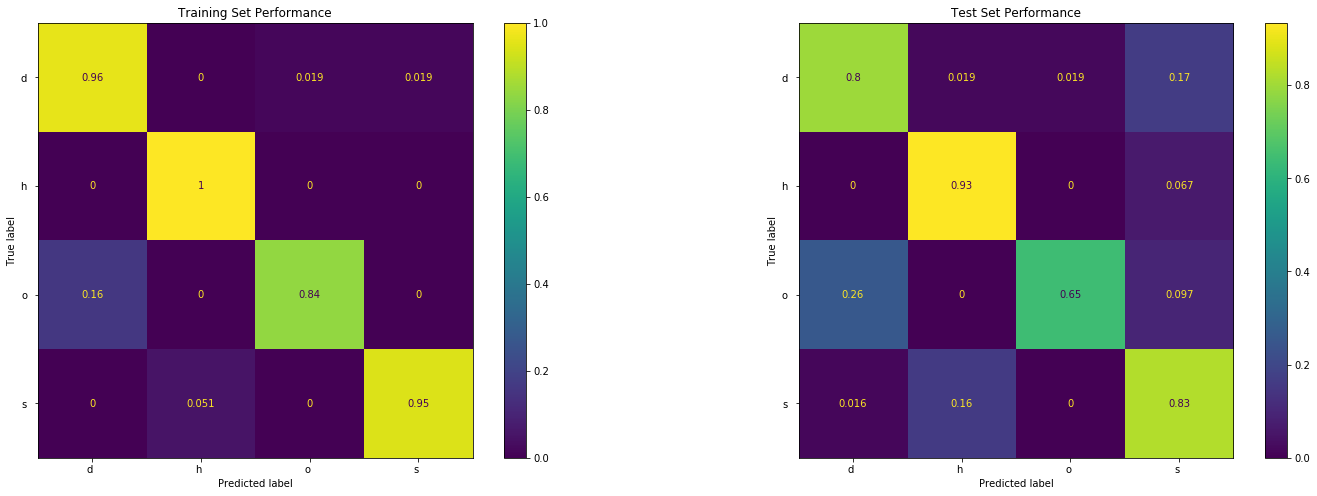

In [69]:
#let's try now
cknn = KNeighborsClassifier(n_neighbors=10)
cknn.fit(X_train, Y_train)
#show first 5 model predictions on the test data
cknn.predict(X_val)[0:5]
#check accuracy of our model on the test data
cknn.score(X_val, Y_val)
eval_model(cknn, X_train, Y_train, X_val, Y_val)

The optimal number of neighbors is 1


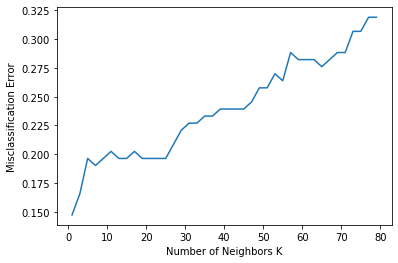

In [70]:
#now, let's iterate through various numbers of neighbors to find the k/n_neighbors that yields the highest accuracy
#for the validation set
neighbors = list(range(1, 80, 2))
#empty list that will hold cv scores
val_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    score = knn.score(X_val, Y_val)
    val_scores.append(score)
#changing to misclassification error
mse = [1 - x for x in val_scores]
#determine best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))
#plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

Test Accuracy: 0.852760736196319


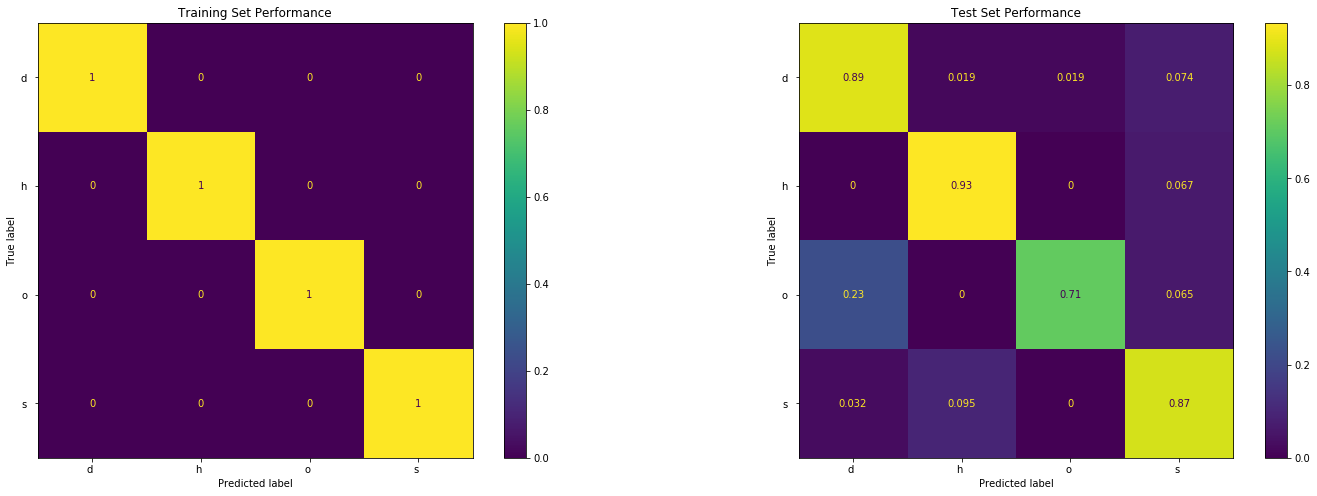

In [72]:
#We can see that by training our model to our training set and then using the validation set to tune the hyper
#parameter, we get the highest accuracy on our classification model with k = 1 neighbors 
#let's try now
cknn = KNeighborsClassifier(n_neighbors=1)
cknn.fit(X_train, Y_train)
#show first 5 model predictions on the test data
cknn.predict(X_val)[0:5]
#check accuracy of our model on the test data
cknn.score(X_val, Y_val)
eval_model(cknn, X_train, Y_train, X_val, Y_val)

Test Accuracy: 0.8765432098765432


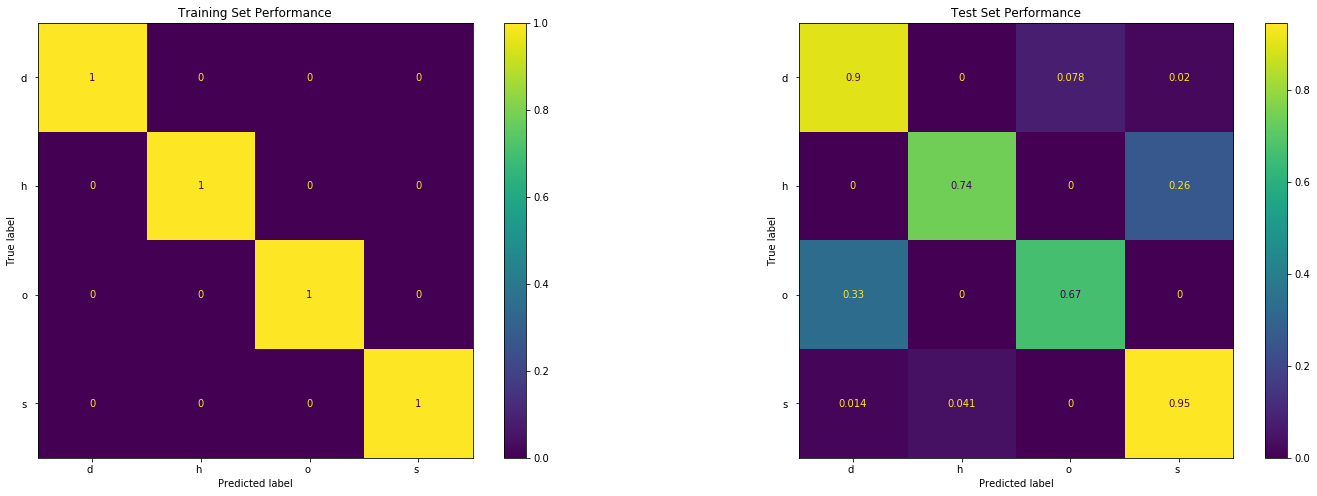

In [73]:
#Now let's evaluate our model on the test set
eval_model(cknn, X_train, Y_train, X_test, Y_test)

# Ensemble of binary classifiers

In [32]:
#OnevsOne

Test Accuracy: 0.8343558282208589


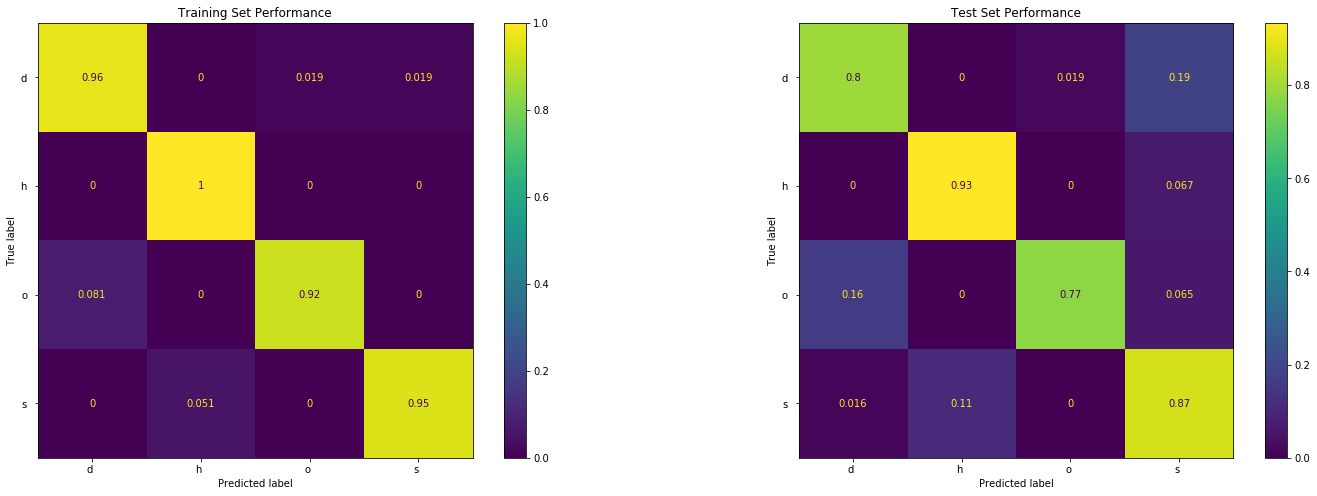

In [75]:
#SVM automatically runs onevsone classifiers when exposed to a multi-class dataset
#We use the validation set to evaluate the model in order to tune parameters for the highest accuracy
#there is no difference in adding class_weight = 'balanced' here for the acccuracy here.
svm = SVC(C = 3, kernel ='rbf')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_val, Y_val)

The optimal value of C is 19


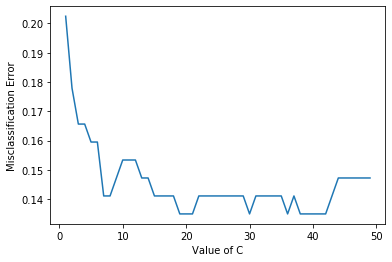

In [49]:
#Let's itarate through values of C to see which one yields the best accuracy
C_list = list(range(1, 50, 1))
#empty list that will hold cv scores
val_scores = []
for c in C_list:
    svm = SVC(C = c, kernel = 'rbf')
    svm.fit(X_train, Y_train)
    score = svm.score(X_val, Y_val)
    val_scores.append(score)
#changing to misclassification error
mse = [1 - x for x in val_scores]
#determine best k
optimal_C = C_list[mse.index(min(mse))]
print("The optimal value of C is {}".format(optimal_C))
#plot misclassification error vs k
plt.plot(C_list, mse)
plt.xlabel("Value of C")
plt.ylabel("Misclassification Error")
plt.show()

Test Accuracy: 0.852760736196319


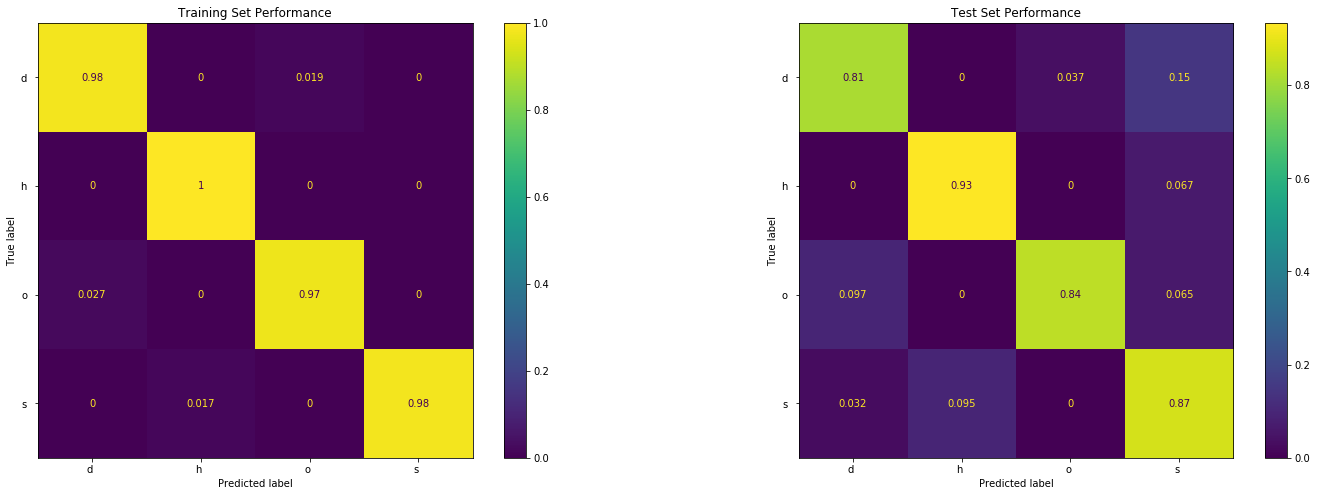

In [60]:
#inlcuding class_weight = 'balanced' actually makes the acurracy worse
svm = SVC(C = 19, kernel = 'rbf')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_val, Y_val)

Test Accuracy: 0.8271604938271605


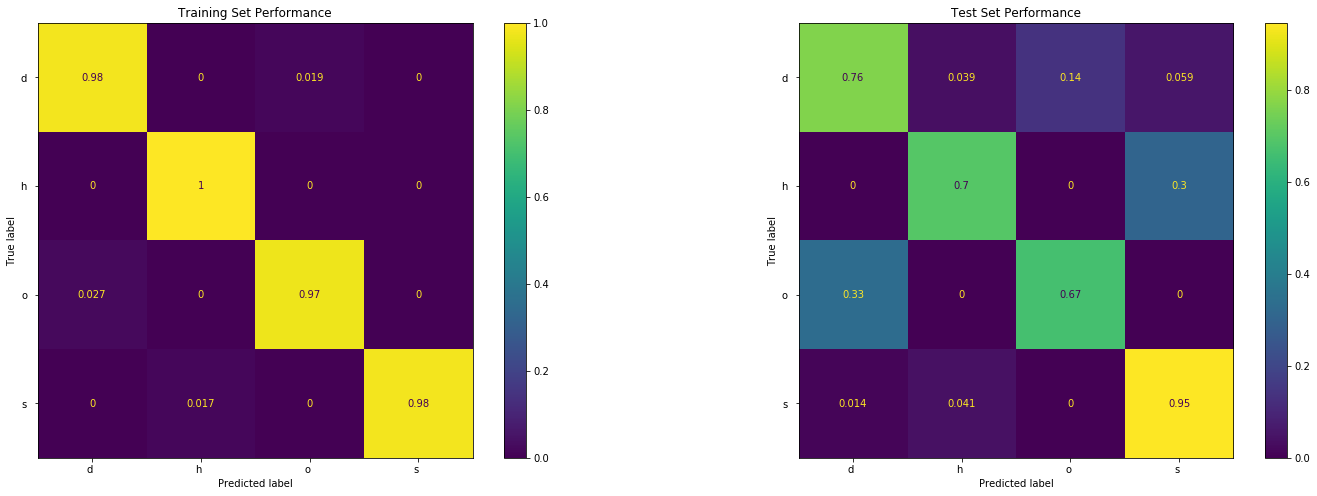

In [51]:
#Now let' evaluate how well the model classifies the training set
svm = SVC(C = 19, kernel = 'rbf')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

In [52]:
#OnevsAll

Test Accuracy: 0.8282208588957055


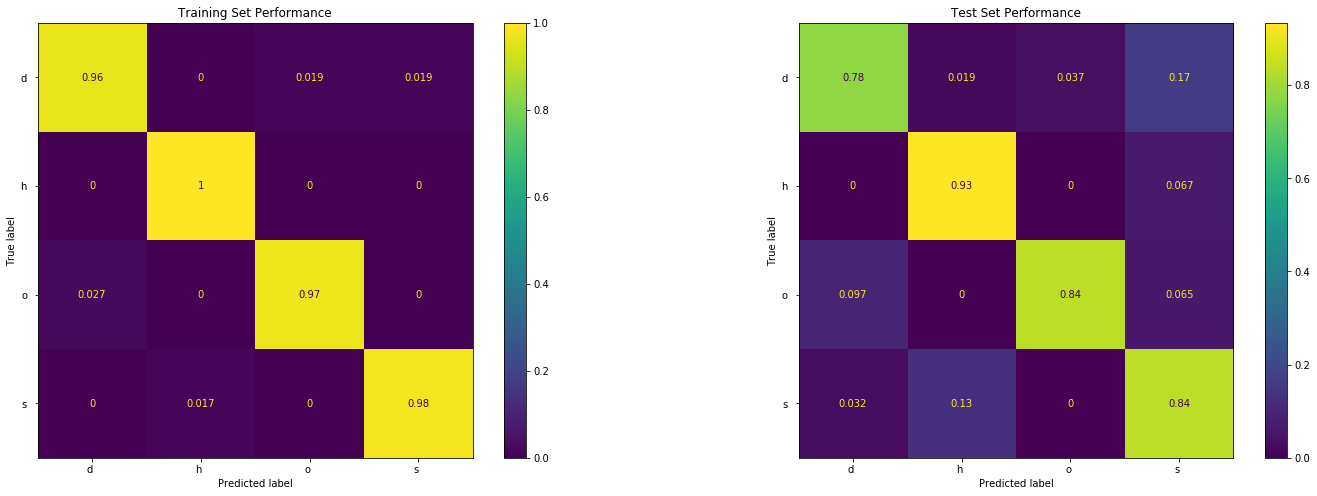

In [55]:
onevsall_svm = OneVsRestClassifier(SVC(class_weight = 'balanced'))
onevsall_svm.fit(X_train, Y_train)
eval_model(onevsall_svm, X_train, Y_train, X_val, Y_val)

The optimal value of C is 11


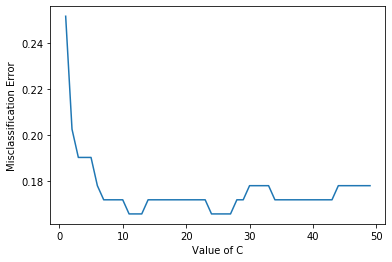

In [56]:
#Let's itarate through values of C to see which one yields the best accuracy in nte SVM
C_list = list(range(1, 50, 1))
#empty list that will hold cv scores
val_scores = []
for c in C_list:
    onevsall_svm = OneVsRestClassifier(SVC(C = c, kernel = 'rbf', class_weight = 'balanced'))
    onevsall_svm.fit(X_train, Y_train)
    score = onevsall_svm.score(X_val, Y_val)
    val_scores.append(score)
#changing to misclassification error
mse = [1 - x for x in val_scores]
#determine best k
optimal_C = C_list[mse.index(min(mse))]
print("The optimal value of C is {}".format(optimal_C))
#plot misclassification error vs k
plt.plot(C_list, mse)
plt.xlabel("Value of C")
plt.ylabel("Misclassification Error")
plt.show()

Test Accuracy: 0.8343558282208589


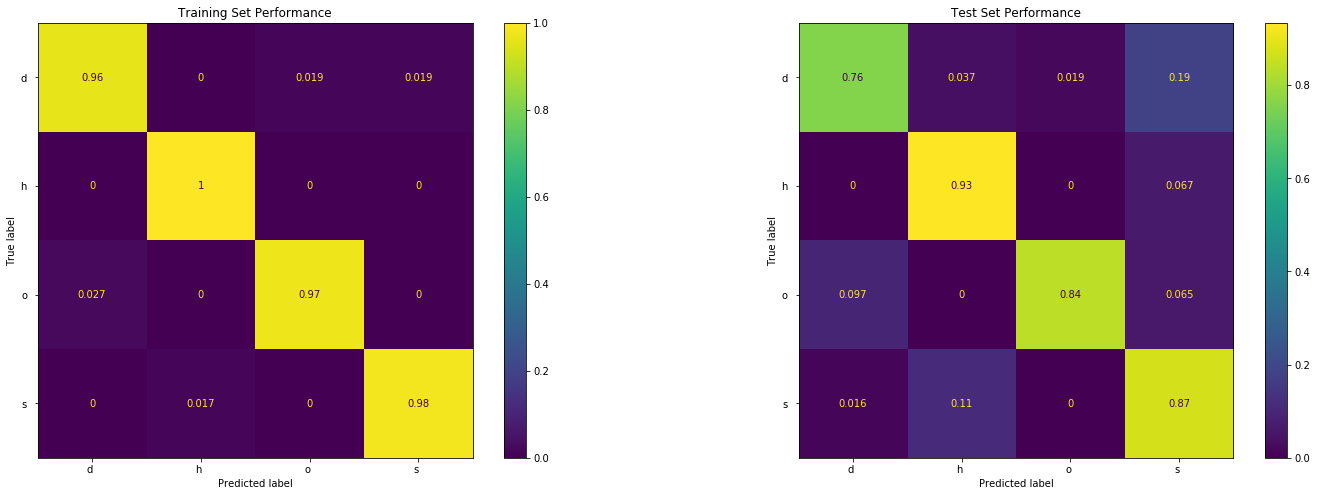

In [57]:
onevsall_svm = OneVsRestClassifier(SVC(C = 11, kernel = 'rbf', class_weight = 'balanced'))
onevsall_svm.fit(X_train, Y_train)
eval_model(onevsall_svm, X_train, Y_train, X_val, Y_val)

Test Accuracy: 0.8333333333333334


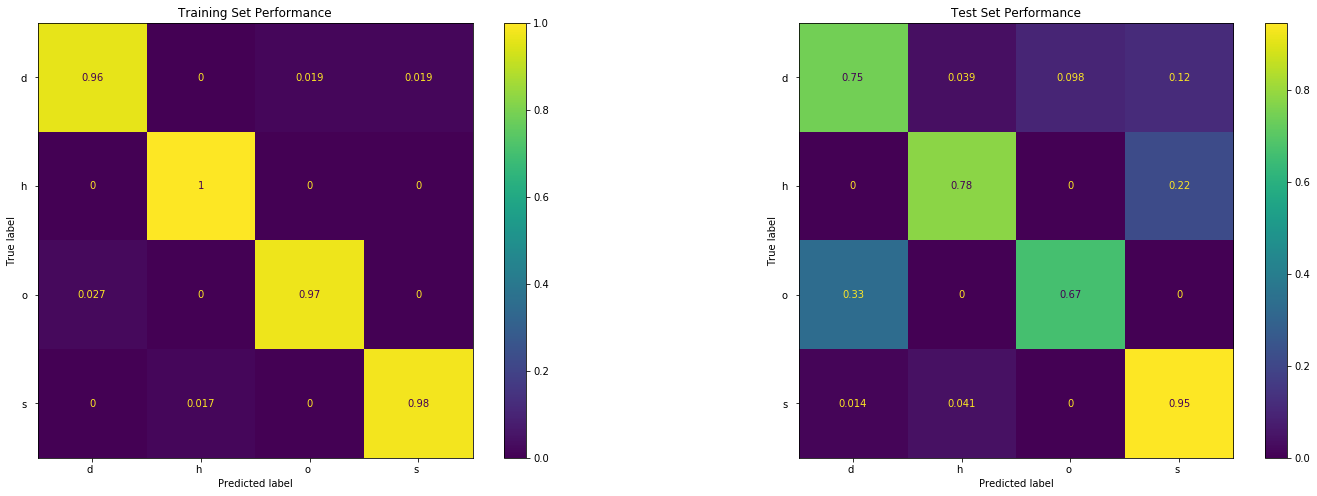

In [58]:
#Now let's evaluate how well the model predicts the test set
onevsall_svm = OneVsRestClassifier(SVC(C = 11, kernel = 'rbf', class_weight = 'balanced'))
onevsall_svm.fit(X_train, Y_train)
eval_model(onevsall_svm, X_train, Y_train, X_test, Y_test)

Text(0, 0.5, 'Entries')

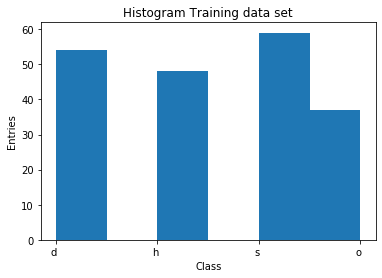

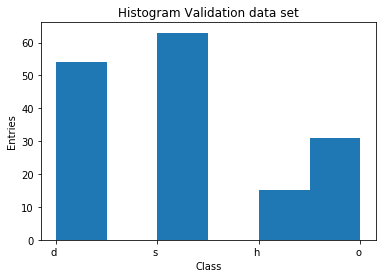

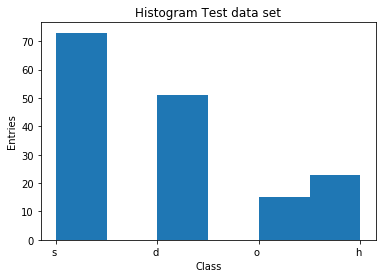

In [78]:
# having a look at class imbalance
plt.figure()
plt.hist(Y_train, 6)
plt.title('Histogram Training data set')
plt.xlabel('Class')
plt.ylabel('Entries')
plt.figure()
plt.hist(Y_val, 6)
plt.title('Histogram Validation data set')
plt.xlabel('Class')
plt.ylabel('Entries')
plt.figure()
plt.hist(Y_test, 6)
plt.title('Histogram Test data set')
plt.xlabel('Class')
plt.ylabel('Entries')